Python期中大作业

设计/编程/监制: 20201504138 黎子骏

调试：朱小天 叶炯尧 赖静怡 郑玉琪

In [25]:
# 该版本采用的是常老师提供的数据进行计算
# overhead
import pandas as pd
import numpy as np
import os
import re
import jieba
import os
from nltk import FreqDist
from collections import Counter
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plt.style.use('grayscale')
plt.rcParams['font.family'] = "Times New Roman"

# 设置相对路径
os.chdir(os.getcwd())

# 相对路径设置失效时请在此修改project根目录
filepath = r"C:\Users\LZJ\OneDrive\学习\py_ass"

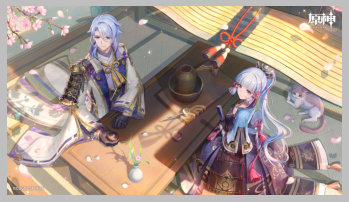

In [26]:

img_np = np.load(filepath + r'\dataimage.npy')
plt.axis('off')
plt.imshow(img_np)
plt.show()

In [27]:
# 定义一个包含描述极端天气的词典
dict_weather = {
    '高温', '海平面上升', '洪水', '干旱','天气','恶劣',
    '雨','雪','风','雷','雾','沙尘','沙尘暴','雾霾','霾',
    '温','湿','冷','阴','高温','低温', 
    '冲击','影响'
    }

In [28]:

df = pd.read_excel(filepath+r"\data\sample.xlsx")

# 使用 str.contains() 方法筛选出包含在词典中的文本
df["body"] = df["body"].str.replace('[^\u4e00-\u9fa5]+', '')  # 删除非汉字项
df['sep'] = df['body'].apply(lambda x: ' '.join(jieba.cut(x)))  # 使用jieba库进行分词
mask = df['body'].str.contains('|'.join(dict_weather), case=False)
filtered_df = df.loc[mask, ['stkcd', 'year', 'body']]

# 将包含词典中关键字的所有文本进行拼接，并使用 Counter 类进行词频统计
text = ' '.join(filtered_df['body']).lower()
word_count = Counter(text.split())

word_count_list = []
for text in df['sep']:
    word_count = Counter(text.split())
    word_count_dict = {word: count for word, count in word_count.items() if word in dict_weather}
    word_count_sum = sum(word_count.values())
    word_count_list.append(word_count_dict)

df['word_count'] = word_count_list
df['word_count_sum'] = pd.Series(word_count_list)

def dict2int(d):
    return sum(d.values())
df['word_count_sum'] = df['word_count_sum'].apply(dict2int)

# 打印词频统计结果
print(df[["stkcd","year","word_count_sum"]])
df.to_excel(filepath + r"\data\sample整合词频.xlsx")

C:\Users\LZJ\AppData\Local\Temp\ipykernel_23508\1545722361.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["body"] = df["body"].str.replace('[^\u4e00-\u9fa5]+', '')  # 删除非汉字项


      stkcd  year  word_count_sum
0    600556  2018               0
1    603963  2018              16
2    600653  2013              10
3    603055  2020               6
4    600538  2017              16
..      ...   ...             ...
495  600654  2016               4
496    2221  2010               7
497     800  2019              10
498  600050  2013               4
499     523  2014               7

[500 rows x 3 columns]


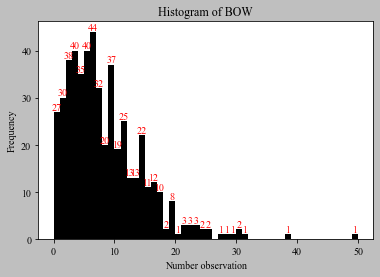

In [29]:
# 绘制词袋法结果的istogram
bins = 50
range_min = df['word_count_sum'].min()
range_max = df['word_count_sum'].max()
# range_max = 10
range_step = (range_max - range_min) / bins
n, bins, patches = plt.hist(df['word_count_sum'], bins=bins, range=(range_min, range_max + range_step), alpha=1)
plt.xlabel('Number observation')
plt.ylabel('Frequency')
plt.title('Histogram of BOW')
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    if n[i]>0:
        plt.text(x, y, str(int(n[i])), ha='center', va='bottom',color = "r")
plt.show()


<Figure size 432x288 with 0 Axes>

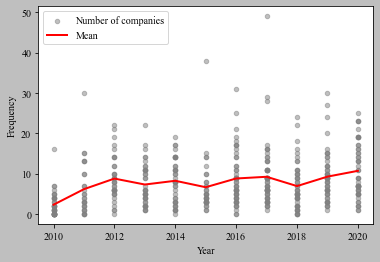

In [30]:
# 绘制年份分布图
fig = plt.figure()
ax1 = df.plot.scatter(x = "year",y="word_count_sum",alpha = 0.5, xlabel="Year",ylabel = "Frequency")
df_mean = df.groupby("year").mean()
df_mean = df_mean.reset_index()
ax2 = plt.plot(df_mean["year"], df_mean["word_count_sum"],color = "red",linewidth = 2,label = "Mean")
plt.legend(["Number of companies", "Mean"])
plt.show()

In [31]:
df_mean

,year,stkcd,word_count_sum
0,2010,193894.809524,2.285714
1,2011,197845.551724,6.137931
2,2012,284649.027027,8.756757
3,2013,315284.809524,7.285714
4,2014,243784.904762,8.214286
5,2015,257099.764706,6.617647
6,2016,377391.745455,8.781818
7,2017,382400.682540,9.206349
8,2018,403473.280000,6.900000
9,2019,335310.169811,9.245283


In [32]:
# 明细词频
df2 = pd.read_excel(filepath + r"\data\sample.xlsx")

def clean_text(text):
    # 删除非汉字项
    return re.sub('[^\u4e00-\u9fa5]+', '', text)

# 对“年报正文”列进行数据清洗和中文分词
df2['body'] = df2['body'].apply(lambda x: clean_text(x))
df2['sep'] = df2['body'].apply(lambda x: jieba.lcut(x))

# 词频统计函数
def count_words(text, dict_list):
    # 构造一个字典，键为词汇，值为该词汇出现的次数
    word_count = {}
    for word in text:
        if word in dict_list:
            if word not in word_count:
                word_count[word] = 1
            else:
                word_count[word] += 1
    # 返回每个词汇出现的频率
    total_count = sum(word_count.values())
    freq_dict = {}
    for word in word_count:

        # 计算绝对频率
        freq_dict[f'{word}'] = word_count[word]
    return freq_dict

def count_words_rel(text, dict_list):
    # 构造一个字典，键为词汇，值为该词汇出现的次数
    word_count = {}
    for word in text:
        if word in dict_list:
            if word not in word_count:
                word_count[word] = 1
            else:
                word_count[word] += 1
    # 返回每个词汇出现的频率
    total_count = sum(word_count.values())
    freq_dict = {}
    for word in word_count:
        # 计算组内相对频率
        freq_dict[f'{word}'] = word_count[word] / total_count
    return freq_dict

# 对“分词结果”列进行词频统计，将结果添加到数据框的最右侧
freq_df = pd.DataFrame(df2['sep'].apply(lambda x: count_words(x, dict_weather)).tolist())
df2 = pd.concat([df2, freq_df], axis=1)

df1 = df2
df2 = df2.fillna(0)
df2["词袋法"] = df2.iloc[:,5:].sum()
df2.to_excel(filepath + r"\data\sample明细词频.xlsx")
print("over")

作业进阶部分

不含碘的海带版权所有，抄袭玩原神抽卡必歪

利用熵权法和变异系数法对各个字典中的词语赋予权重，并对词频进行加权

#
1. 熵权法原理

先对变量进行0-1标准化。因为数据集全部是正项，在这里只考虑正数情况下的伸缩变换。考虑到样本数据并非平衡面板，所以我就只对指标(列向量)加了一次权，而没有考虑年份(行向量)权重。

$$
X_{ij} = \frac{X_{ij}-X_{min}}{X_{max}-X_{min}} \tag{1}
$$

然后计算权重矩阵
$$
p_{ij} = \frac{X_{ij}}{\sum_{i}^{n}X_{ij}} \tag{2}
$$

计算熵值
$$
E_{ij} = -ln(\frac{1}{n})\sum_{i=1}^{n}p_{ij}ln(p_{ij}) \tag{3}
$$

计算信息冗余度$D_{ij}$，并最终求出熵权$W_{j}$，从而求出加权平均指数$s_i$
$$
D_{j} = 1 - E_{j} \tag{4}
$$

$$
W_{j} = \frac{D_{j}}{\sum_{j=1}^{m}D_j} \tag{5}
$$

$$
s_i =  \sum_j^m w_j*p_{ij} \tag{6}
$$

#
2. 变异系数权重法
   先计算每个列向量的变异系数，其中$sigma_i$是列向量数组的标准差，$mu_i$是平均值
   $$
    CV_i = \frac{\sigma_i}{\mu_i} \tag{6}
   $$

   然后计算每个指标变异系数所占比重
   $$
    w_i = \frac{CV_i}{\sum_{i = 1}^n CV_i} \tag{7}
   $$

同理可得加权平均综合指数

<AxesSubplot:title={'center':'BOW mean extreme weather words'}, xlabel='year'>

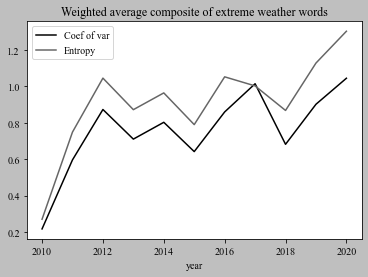

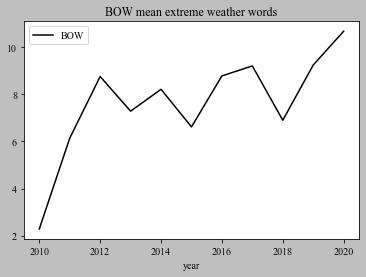

In [ ]:
#IO
df1 = pd.read_excel(filepath + r"\data\df1.xlsx")
integrated = pd.read_excel(filepath + r"\data\sample整合词频.xlsx")
# integrated["word_count_sum"] = integrated["word_count_sum"].apply(lambda x: (x-np.min(integrated["word_count_sum"]))/(np.max(integrated["word_count_sum"])-np.min(integrated["word_count_sum"])))
del df1["Unnamed: 0"]
# 提取需加权的列名
cols = df1.columns[3:]

# 熵值法计算权重d
maxmin = df1[cols].apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
# p = df1[cols].apply(lambda x: x.value_counts()/len(x))
p = maxmin.apply(lambda x: x.value_counts()/len(x))
entropy = (-p*np.log(p)).sum()
weights_entropy = (1-entropy)/sum(1-entropy)

# 变异系数法计算权重
coefs_of_var = df1[cols].std() / df1[cols].mean()
weights_cv = coefs_of_var / coefs_of_var.sum()

# 计算加权综合指数（熵值法）
df1['weighted_index_entropy'] = (df1[cols] * weights_entropy).sum(axis=1)
df1['weighted_index_entropy'].fillna(df1['weighted_index_entropy'].mean(), inplace=True) # 如果存在缺失值，则替换为均值
df1['weighted_index_entropy'] = df1['weighted_index_entropy'].apply(lambda x: abs(x))

# 计算加权综合指数（变异系数法）
df1['weighted_index_cv'] = (df1[cols] * weights_cv).sum(axis=1)
df1['weighted_index_cv'].fillna(df1['weighted_index_cv'].mean(), inplace=True) # 如果存在缺失值，则替换为均值
df1 = df1.merge(integrated[["stkcd","year","word_count_sum"]],on=["stkcd","year"])

df1[["stkcd","name","year","weighted_index_entropy","weighted_index_cv"]].to_excel(filepath + r"\data\sample加权指数.xlsx")

df1_mean = df1.groupby("year").mean()
df1_mean = df1_mean.reset_index()

df1_mean.plot( x = "year", y = ["weighted_index_cv","weighted_index_entropy"],label = ["Coef of var","Entropy"],title = "Weighted average composite of extreme weather words")
df1_mean.plot( x = "year", y = ["word_count_sum"],label = ["BOW"],title = "BOW mean extreme weather words")